### Sales Forecast

**Motivation! What's the context?**
- In 2017 Olist started to forecast its monthly sales based on the average revenue from 3 months before. But now the company  wants to be able to predict future sales more accurately.

**Why?**
- To efficiently allocate resources for future projects, growth and manage its cash flow. 

**Who are the stakeholders?**
- The financial sector will use the forecast to the set operating budgets and to project cash flows.
- And the marketing team, who will have the opportunity to schedule promotions if it appears sales <br>
will be weak and will be able to better allocate budget among other marketing activities.

**What is the deliverable?**
- A dashboard with the information about the forecast.


> **ps: We will use the data to forecast the second quarter of 2018 and the third quarter will be our "production data".**

## Agenda

[Cycles Notes](#Cycles-Notes)<br>

[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>

&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>


# Cycles Notes

**1st - .**

**2nd - .**

**3rd - .**

In [1]:
from notebook_utils.utils import *
from notebook_utils.ml_utils import *

import os 
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA

In [2]:
directory = Directory("1.2-pr-sales-prediction-machine-learning-arima")

## 0.0 Loading Data

Since We are not preprocessing any dat we can use the project proposal serie itself.

In [73]:
 df = pd.read_pickle(os.path.join(os.path.join(directory.DATA_DIR, 'sales_forecast_data'), 'olist_2017_forecasts_table_model.pkl'))

In [74]:
y_train = df[:-5]['known_revenue']
y_test = df[-5:]['known_revenue']

In [75]:
df.round(2)

known_revenue  estimated_revenue
year month                                  
2017 1          127482.37           15551.25
     2          271239.32           57997.55
     3          414330.95          132913.77
     4          390812.40          271017.55
     5          566851.40          358794.22
     6          490050.37          457331.58
     7          566299.08          482571.39
     8          645832.36          541066.95
     9          701077.49          567393.94
     10         751117.01          637736.31
     11        1153364.20          699342.29
     12         843078.29          868519.57
2018 1         1077887.46          915853.17
     2          966168.41         1024776.65
     3         1120598.24          962378.05
     4         1132878.93         1054884.70
     5         1128774.52         1047217.12
     6         1011978.29         1074233.35
     7         1027807.28         1058778.39
     8          985491.64         1060076.29

In [82]:
model = ARIMA(y_train.values, order=(6,0,0)).fit()
predictions = model.forecast(5)
evaluation(y_test, predictions)

On average, our predictions are 6.87% above or below the real value.
Which means an error of about R$ 73592.07


(73592.07, 6.8728356213716975)

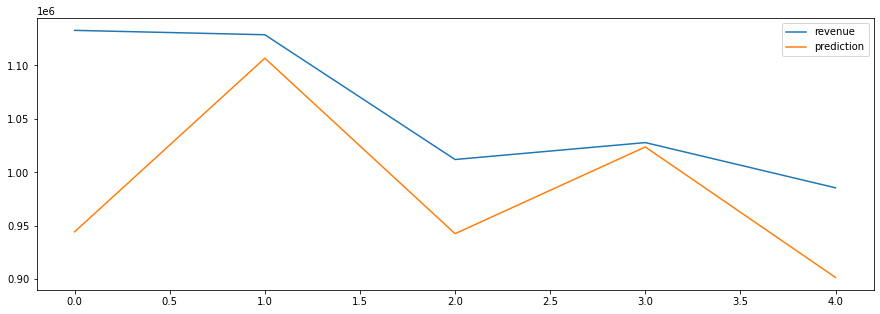

In [83]:
arima_evaluation = pd.concat([pd.Series(y_test.ravel(), name='revenue'), pd.Series(predictions.ravel(), name='prediction')], axis=1)
arima_evaluation.plot(figsize=(15,5));

In [84]:
evaluation(y_test[:3], predictions[:3])

On average, our predictions are 8.48% above or below the real value.
Which means an error of about R$ 93319.29


(93319.29, 8.483813190670453)

In [85]:
evaluation(y_test[3:], predictions[3:])

On average, our predictions are 4.46% above or below the real value.
Which means an error of about R$ 44001.24


(44001.24, 4.456369267423567)

In [86]:
aa = df.copy()
aa['arima_forecast'] = 0
aa['arima_forecast'][-5:] = predictions

<ipython-input-86-a2f4e0dc1ec3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['arima_forecast'][-5:] = predictions
C:\Users\WALDENIO_NOT\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='year,month'>

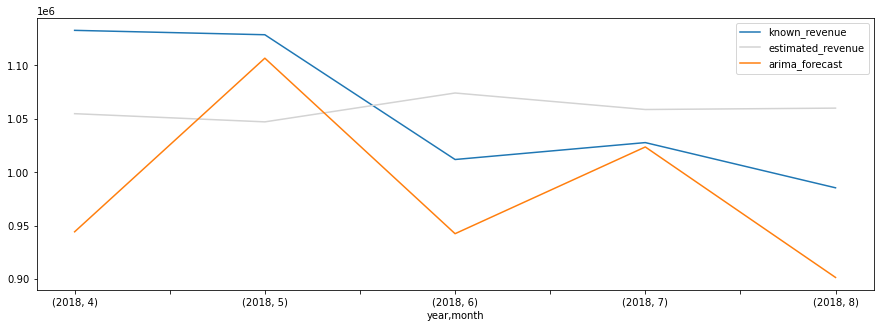

In [87]:
aa[-5:].plot(figsize=(15,5), color=['#1f77b4','lightgrey','#ff7f0e'])

In [88]:
aa.round(2)

known_revenue  estimated_revenue  arima_forecast
year month                                                  
2017 1          127482.37           15551.25            0.00
     2          271239.32           57997.55            0.00
     3          414330.95          132913.77            0.00
     4          390812.40          271017.55            0.00
     5          566851.40          358794.22            0.00
     6          490050.37          457331.58            0.00
     7          566299.08          482571.39            0.00
     8          645832.36          541066.95            0.00
     9          701077.49          567393.94            0.00
     10         751117.01          637736.31            0.00
     11        1153364.20          699342.29            0.00
     12         843078.29          868519.57            0.00
2018 1         1077887.46          915853.17            0.00
     2          966168.41         1024776.65            0.00
     3         1120598.24          962378.05            0.00
     4         1132878.93         1054884.70       944309.93
     5         1128774.52         1047217.12      1106828.69
     6         1011978.29         1074233.35       942535.25
     7         1027807.28         1058778.39      1023722.27
     8          985491.64         1060076.29       901574.17